In [ ]:
#import, data가지고 오고, 결측치 확인, load.txt   numpy배열로 가져와   pd.read.csv 보고 ,  어떤거 0,1 어떤거 몇백 단위 그럼 차원 일치시킴, (무든 데이터 1-10사이 차이 많이 안남 그러면 scale조정 필요없음,)
# x,y 분리  #다중분류, 원핫인토딩 to categorical(), 
# train, test 데이터 나눠  8:2     많으면 (만개 이상) 7:3     진짜 풍부  train,test, validation 
# validation_split 0.2 


# pd.get_dummies()  안에 숫자 아니여도 상관없음 
# data 2,3배 정도만 차이나면 scale조정안해도되는데, 이 데이터는 sulphates와 dioxide가 100배 차이남. 따라서 scale 조정을 해야 

In [1]:
import numpy as np
import pandas as pd # read_csv, # get_dummies : 원핫인코딩
import tensorflow.keras.utils as utils  # 원핫인코딩
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping

# 원핫인코딩의 방법이 2가지

In [2]:
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_y = redwine.iloc[:,-1]
print(redwine_y.unique())
redwine_y = pd.get_dummies(redwine_y).to_numpy()
redwine_y

[5 6 7 4 8 3]


array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [3]:
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_y = redwine.iloc[:,-1]
print(redwine_y.unique())
redwine_y = utils.to_categorical(redwine_y)
redwine_y[:5]

[5 6 7 4 8 3]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

종속변수가 될 와인 등급 : [5 6 7 4 8 3]
Epoch 1/500
5/5 [==============================] - 1s 255ms/step - loss: 1.6809 - accuracy: 0.3436 - val_loss: 1.5768 - val_accuracy: 0.3750
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 1.5362 - accuracy: 0.4043 - val_loss: 1.4642 - val_accuracy: 0.3750
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 1.4148 - accuracy: 0.4088 - val_loss: 1.3795 - val_accuracy: 0.3750
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 1.3453 - accuracy: 0.4199 - val_loss: 1.3098 - val_accuracy: 0.3929
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 1.2755 - accuracy: 0.4082 - val_loss: 1.2447 - val_accuracy: 0.4018
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 1.2068 - accuracy: 0.4314 - val_loss: 1.1874 - val_accuracy: 0.4241
Epoch 7/500
5/5 [==============================] - 0s 11ms/step - loss: 1.1407 - accuracy: 0.4852 - val_loss: 1.1392 - val_accurac

5/5 [==============================] - 0s 9ms/step - loss: 0.7617 - accuracy: 0.6989 - val_loss: 0.9502 - val_accuracy: 0.6295
Epoch 60/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7434 - accuracy: 0.7021 - val_loss: 0.9508 - val_accuracy: 0.6295


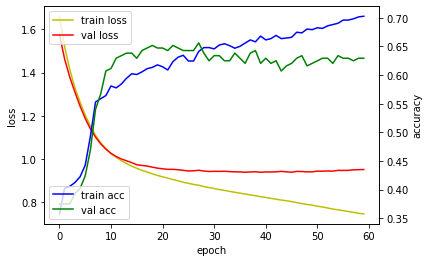

In [4]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy() # 6개 분류로 나눠짐
redwine_y = redwine.iloc[:,-1]
print('종속변수가 될 와인 등급 :',redwine_y.unique()) # 결과가 5 6 7 4 8 3 등급

# scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(redwine_x)
redwine_x = scaler.transform(redwine_x)

# 데이터 셋 전처리(라벨링) ; 원 핫 인코딩 후 numpy형으로 변환
redwine_y = pd.get_dummies(redwine_y).to_numpy() # 3등급의 경우 [1 0 0 0 0 0]
# redwine_y = utils.to_categorical(redwine_y) # 3등급의 경우 [0 0 0 1 0 0 0 0 0]

# 훈련셋과 테스트셋 분리
train_X, test_X, train_Y, test_Y = \
    train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11))
model.add(Dense(50, activation='relu'))
# model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(6, activation='softmax')) # 3,4,5,6,7,8 등급 분류

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', 
#                metrics=[metrics.Recall()])
# model.compile(optimizer='adam', loss='categorical_crossentropy', 
#                metrics=[metrics.Precision()])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
fit_hist = model.fit(train_X, train_Y, batch_size=200, epochs=500,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# 5. 모델 학습 과정 표시하기
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train acc')
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [5]:
pred = np.argmax(model.predict(scaler.transform(test_X)), axis=1)+3
real = np.argmax(test_Y, axis=1)+3
ct = pd.crosstab(real, pred)
ct.index.name = "real"
ct.columns.name='predict'
ct

predict,5,6
real,,
3,0,2
4,0,21
5,6,201
6,9,186
7,1,51
8,0,3


In [6]:
# 6. 모델 사용하기
loss_and_acc = model.evaluate(train_X, train_Y, batch_size=32)
print('loss : ', loss_and_acc[0])
print('accuracy : ', loss_and_acc[1])

35/35 [==============================] - 0s 659us/step - loss: 0.7817 - accuracy: 0.6890
loss :  0.7817196249961853
accuracy :  0.6890080571174622


# redwine_y = utils.to_categorical(redwine_y)

종속변수가 될 와인 등급 : [5 6 7 4 8 3]
Epoch 1/500
5/5 [==============================] - 1s 48ms/step - loss: 2.2045 - accuracy: 0.0728 - val_loss: 2.1003 - val_accuracy: 0.1429
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 2.0667 - accuracy: 0.2348 - val_loss: 1.9850 - val_accuracy: 0.3393
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 1.9537 - accuracy: 0.3909 - val_loss: 1.8751 - val_accuracy: 0.4509
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 1.8431 - accuracy: 0.5313 - val_loss: 1.7602 - val_accuracy: 0.5089
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 1.7268 - accuracy: 0.5579 - val_loss: 1.6355 - val_accuracy: 0.5491
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 1.5928 - accuracy: 0.5673 - val_loss: 1.5031 - val_accuracy: 0.5714
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 1.4663 - accuracy: 0.5683 - val_loss: 1.3704 - val_accuracy: 0

5/5 [==============================] - 0s 10ms/step - loss: 0.7756 - accuracy: 0.6941 - val_loss: 0.9478 - val_accuracy: 0.6116
Epoch 60/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7887 - accuracy: 0.6920 - val_loss: 0.9487 - val_accuracy: 0.6384
Epoch 61/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7716 - accuracy: 0.6938 - val_loss: 0.9507 - val_accuracy: 0.6384
Epoch 62/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7663 - accuracy: 0.7063 - val_loss: 0.9523 - val_accuracy: 0.6250
Epoch 63/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7845 - accuracy: 0.6983 - val_loss: 0.9478 - val_accuracy: 0.6295
Epoch 64/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7578 - accuracy: 0.7022 - val_loss: 0.9498 - val_accuracy: 0.6295
Epoch 65/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7764 - accuracy: 0.6925 - val_loss: 0.9546 - val_accuracy: 0.6384
Epoch 66/500
5/5 [==========

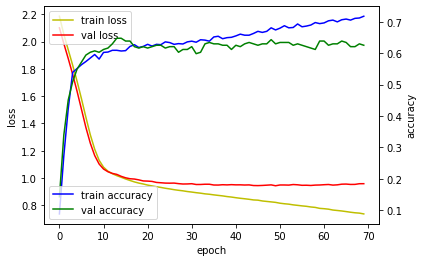

In [8]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy() # 6개 분류로 나눠짐
redwine_y = redwine.iloc[:,-1]
print('종속변수가 될 와인 등급 :',redwine_y.unique()) # 결과가 5 6 7 4 8 3 등급

# scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(redwine_x)
redwine_x = scaler.transform(redwine_x)

# 데이터 셋 전처리(라벨링) ; 원 핫 인코딩 후 numpy형으로 변환
# redwine_y = pd.get_dummies(redwine_y).to_numpy()
redwine_y = utils.to_categorical(redwine_y)

# 훈련셋과 테스트셋 분리
train_X, test_X, train_Y, test_Y = \
    train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11))
model.add(Dense(50, activation='relu'))
# model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(9, activation='softmax')) # 3,4,5,6,7,8 등급 분류

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.Recall()])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.Precision()])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
fit_hist = model.fit(train_X, train_Y, batch_size=200, epochs=500,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# 5. 모델 학습 과정 표시하기
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train accuracy')
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [9]:
pred = np.argmax(model.predict(scaler.transform(test_X)), axis=1)
ct = pd.crosstab(np.argmax(test_Y, axis=1), pred)
ct.index.name="real"
ct.columns.name="predict"
ct

predict,5,6,7
real,,,
3,1,1,0
4,1,20,0
5,19,188,0
6,19,176,0
7,3,48,1
8,0,3,0


In [10]:
# 6. 모델 사용하기
loss_and_acc = model.evaluate(train_X, train_Y, batch_size=32)
print('loss : ', loss_and_acc[0])
print('accuracy : ', loss_and_acc[1])

35/35 [==============================] - 0s 630us/step - loss: 0.7780 - accuracy: 0.6979
loss :  0.7780441045761108
accuracy :  0.6979445815086365
